<a href="https://colab.research.google.com/github/emeghana3383/Image-Classification-using-CNN/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.8815 - loss: 0.3977 - val_accuracy: 0.9822 - val_loss: 0.0610
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9835 - loss: 0.0538 - val_accuracy: 0.9880 - val_loss: 0.0396
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9867 - val_loss: 0.0456
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.9888 - val_loss: 0.0423
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9903 - val_loss: 0.0425
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9881 - loss: 0.0356
Test Accuracy: 99.08%


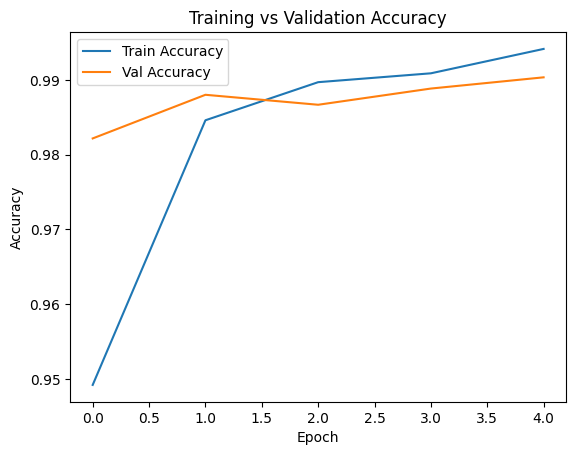

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocess Data
# Reshape to (28, 28, 1) since MNIST is grayscale
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 4: Build CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Step 7: Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 8: Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
